In [1]:
import numpy as np
import pandas as pd 
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import os
print(os.listdir(r"D:\Matlab pics\AIMS"))

['Assign 7', 'TRIAL.m', 'X_test.csv', 'X_train.csv', 'y_train.csv']


In [3]:
X_train = pd.read_csv(r"D:\Matlab pics\AIMS\X_train.csv")
X_test = pd.read_csv(r"D:\Matlab pics\AIMS\X_test.csv")
Y_train = pd.read_csv(r"D:\Matlab pics\AIMS\y_train.csv")
X_train

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.104880,-0.105970,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.104900,-0.106000,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.104920,-0.105970,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.104950,-0.105970,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.104950,-0.105960,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487675,3809_123,3809,123,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.142740,3.27180,2.0115,-9.0063
487676,3809_124,3809,124,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.132380,4.42750,3.0696,-8.1257
487677,3809_125,3809,125,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.138940,2.70480,4.2622,-8.1443
487678,3809_126,3809,126,0.62903,-0.76850,-0.084414,0.081231,-0.069153,0.013229,-0.130210,2.54100,4.7130,-9.4435


In [4]:
Y_train['Y'] = Y_train['surface'].map({'fine_concrete':0, 'concrete':1, 'soft_tiles':2, 'tiled':3, 'soft_pvc':4, 'hard_tiles_large_space':5, 'carpet':6, 'hard_tiles':7, 'wood':8})
Y_train

,series_id,group_id,surface,Y
0,0,13,fine_concrete,0
1,1,31,concrete,1
2,2,20,concrete,1
3,3,31,concrete,1
4,4,22,soft_tiles,2
...,...,...,...,...
3805,3805,55,tiled,3
3806,3806,67,wood,8
3807,3807,48,fine_concrete,0
3808,3808,54,tiled,3


In [5]:
merged = X_train.set_index('series_id').join(Y_train.set_index('series_id'))
merged.head()



,row_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface,Y
series_id,,,,,,,,,,,,,,,
0,0_0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete,0
0,0_1,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete,0
0,0_2,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete,0
0,0_3,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete,0
0,0_4,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete,0


In [6]:
merged1 = merged.drop(['measurement_number', 'row_id'], axis=1)
trainx = merged1[['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z']]

trainx


,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
series_id,,,,,,,,,,
0,-0.75853,-0.63435,-0.104880,-0.105970,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
0,-0.75853,-0.63434,-0.104900,-0.106000,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
0,-0.75853,-0.63435,-0.104920,-0.105970,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
0,-0.75852,-0.63436,-0.104950,-0.105970,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
0,-0.75852,-0.63435,-0.104950,-0.105960,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410
...,...,...,...,...,...,...,...,...,...,...
3809,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.142740,3.27180,2.0115,-9.0063
3809,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.132380,4.42750,3.0696,-8.1257
3809,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.138940,2.70480,4.2622,-8.1443


In [7]:
import pandas as pd
from sklearn import preprocessing

x= trainx.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
trainx = pd.DataFrame(x_scaled)

In [8]:
trainx

,0,1,2,3,4,5,6,7,8,9
0,0.116555,0.179569,0.181924,0.162658,0.532676,0.471071,0.477982,0.484717,0.635446,0.464739
1,0.116555,0.179574,0.181861,0.162561,0.524123,0.477239,0.478967,0.499656,0.632379,0.467150
2,0.116555,0.179569,0.181798,0.162658,0.511105,0.476738,0.475442,0.491363,0.632820,0.472008
3,0.116561,0.179564,0.181704,0.162658,0.506737,0.472011,0.474314,0.500849,0.630286,0.462312
4,0.116561,0.179569,0.181704,0.162690,0.510645,0.466134,0.479668,0.487996,0.632186,0.459869
...,...,...,...,...,...,...,...,...,...,...
487675,0.817819,0.111628,0.246245,0.763393,0.510222,0.509039,0.423952,0.539894,0.634976,0.470028
487676,0.817885,0.111678,0.246327,0.763412,0.512764,0.478583,0.427853,0.555755,0.640416,0.476263
487677,0.817920,0.111714,0.246390,0.763666,0.502840,0.460348,0.425383,0.532112,0.646548,0.476132
487678,0.817981,0.111769,0.246173,0.763836,0.494680,0.468913,0.428670,0.529864,0.648865,0.466932


In [9]:
trainy = merged1[['Y']]
trainy
train_x, test_x, train_y, test_y  = train_test_split(trainx, trainy, test_size=0.15,train_size=0.2, random_state=3) 

In [10]:
from keras.utils import to_categorical
y_binary = to_categorical(trainy)
Y = pd.DataFrame(data = y_binary)
Y

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
487675,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
487676,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
487677,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
487678,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
train_x, test_x, train_y, test_y  = train_test_split(trainx, Y, test_size=0.1,train_size=0.30) 

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
model = Sequential()
model.add(Dense(64, input_dim = 10 , activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(9, activation = 'softmax'))

model.compile(loss = 'mean_squared_error' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_x,train_y, epochs = 100, batch_size = 128)



Epoch 1/100
1143/1143 [==============================] - 2s 1ms/step - loss: 0.0813 - accuracy: 0.4212
Epoch 2/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0696 - accuracy: 0.5247
Epoch 3/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0653 - accuracy: 0.5572
Epoch 4/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0625 - accuracy: 0.5791
Epoch 5/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0604 - accuracy: 0.5980
Epoch 6/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0587 - accuracy: 0.6118
Epoch 7/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0574 - accuracy: 0.6223
Epoch 8/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0565 - accuracy: 0.6308
Epoch 9/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0557 - accuracy: 0.6373
Epoch 10/100
1143/1143 [==============================] - 1s 1ms/step - l

1143/1143 [==============================] - 2s 1ms/step - loss: 0.0288 - accuracy: 0.8212
Epoch 80/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0289 - accuracy: 0.8204
Epoch 81/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0288 - accuracy: 0.8207
Epoch 82/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0287 - accuracy: 0.8219
Epoch 83/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0283 - accuracy: 0.8241
Epoch 84/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0282 - accuracy: 0.8243
Epoch 85/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0282 - accuracy: 0.8256
Epoch 86/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0279 - accuracy: 0.8276
Epoch 87/100
1143/1143 [==============================] - 1s 1ms/step - loss: 0.0281 - accuracy: 0.8251
Epoch 88/100
1143/1143 [==============================] - 1s 1ms/step - loss:

In [13]:
y_pred = model.predict_classes(test_x)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([8, 2, 4, ..., 1, 8, 3], dtype=int64)

In [14]:
Y_pred = pd.DataFrame(data = y_pred)
Y_pred

,0
0,8
1,2
2,4
3,3
4,2
...,...
48763,8
48764,4
48765,1
48766,8


In [15]:
columns = {'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7}

In [16]:
test_y = test_y.rename(columns = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i'})
test_y.reset_index(level = 0, inplace = True)
test_y

,index,a,b,c,d,e,f,g,h,i
0,276609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,108066,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,122916,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,233057,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,175308,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
48763,72886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48764,310705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48765,430091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48766,437043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
test_y['Y'] = 1

In [21]:
import sys
for i in range(len(test_y)):
    if test_y['a'][i]== 1 :
        test_y['Y'][i] = 0
    elif test_y['b'][i]==1:
        
        test_y['Y'][i] = 1
    elif test_y['c'][i]==1:
        
        test_y['Y'][i] = 2
    elif test_y['d'][i]==1:
        
        test_y['Y'][i] = 3
    elif test_y['e'][i]==1:
        
        test_y['Y'][i] = 4
    elif test_y['f'][i]==1:
        
        test_y['Y'][i] = 5
    elif test_y['g'][i]==1:
        
        test_y['Y'][i] = 6
    elif test_y['h'][i]==1:
        
        test_y['Y'][i] = 7
    else:
        test_y.Y[i] = 8
test_y

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: S

,index,a,b,c,d,e,f,g,h,i,Y
0,276609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8
1,108066,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,122916,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,233057,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
4,175308,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
48763,72886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8
48764,310705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48765,430091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
48766,437043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8


In [22]:
y_target = test_y['Y']
y_predicted = y_pred
y_predicted

array([8, 2, 4, ..., 1, 8, 3], dtype=int64)

In [23]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_target=y_target, y_predicted=y_predicted)
cm


array([[3775,  158,   84,  166,  199,   13,    9,    0,   89],
       [ 149, 8789,  100,   90,  381,   48,   34,    0,  333],
       [  88,  251, 3272,   90,   34,    0,   10,   14,   55],
       [   4,   72,   88, 5946,  278,   14,  115,    0,  139],
       [ 156,  401,   75,  290, 8161,   26,  123,    0,  102],
       [  91,  679,  110,   43,  155, 2677,   11,   10,  196],
       [  18,  263,   64,  133,   31,  137, 1415,   45,  334],
       [   0,   57,   11,   20,    0,   38,    0,  151,   12],
       [ 142,  455,   61,  163,  544,   87,   66,    0, 6328]])

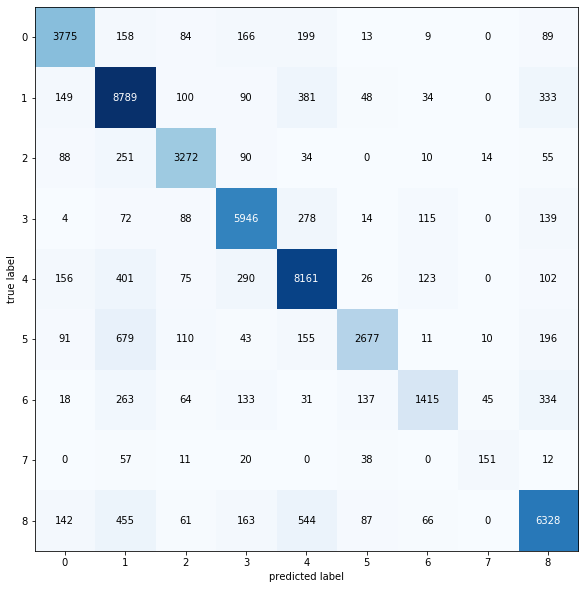

In [24]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 10))
plt.show()